In [ ]:
  pip install torch torchvision transformers pandas openpyxl requests Pillow

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/')

Mounted at /content/drive


In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
processor = BlipProcessor.from_pretrained("noamrot/FuseCap")
model = BlipForConditionalGeneration.from_pretrained("noamrot/FuseCap").to(device)

raw_image = Image.open('tulips/2.jpg').convert('RGB')

text = "a picture of "
inputs = processor(raw_image, text, return_tensors="pt").to(device)

out = model.generate(**inputs, num_beams = 3)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/896M [00:00<?, ?B/s]

a picture of a close - up of a white flower with scattered white petals


In [ ]:
def image_to_text(image_path):
  raw_image = Image.open(image_path).convert('RGB')
  text = ""
  inputs = processor(raw_image, text, return_tensors="pt").to(device)
  out = model.generate(**inputs, num_beams = 3)
  return (processor.decode(out[0], skip_special_tokens=True))

In [ ]:
import os
from openpyxl import Workbook
from openpyxl.worksheet.hyperlink import Hyperlink

# Folder path containing images
image_folder = 'tulips'

# Output Excel file path
excel_file_path = 'image_links_and_description.xlsx'

# Create a new workbook and select the active sheet
wb = Workbook()
ws = wb.active

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

# Define the column where you want to insert hyperlinks and its name
column_index = 1  # Column A
column_name = 'Image Links'

# Set the name of the column in the first row
ws.cell(row=1, column=column_index).value = column_name

# Iterate through each image file and insert hyperlink into the Excel column
for row_index, image_file in enumerate(image_files, start=2):  # Start from row 2 to leave the first row for column names
    image_path = os.path.join(image_folder, image_file)

    # Create a hyperlink to the image file
    hyperlink = Hyperlink(ref=f'{chr(ord("A") + column_index - 1)}{row_index}', target=image_path)

    # Set the hyperlink to the cell
    ws.cell(row=row_index, column=column_index).hyperlink = hyperlink

# Save the workbook to the specified file
wb.save(excel_file_path)


In [ ]:
import pandas as pd
data = pd.read_excel('image_links_and_description.xlsx')

In [ ]:
data['Description'] = ""

In [ ]:
for i in range(0, len(data)):
  text = image_to_text(data.iloc[i, 0])
  data.iloc[i, 1] = text.replace("#", "")
  print(data.iloc[i, 1])

ylish purple and yellow flowers bloom amidst lush green foliage in the grass
ylish red and white flowers in close - up, including a white flower and a red and orange flower, with a single red petal visible in the foreground
ylish pink tulips in various shades of pink and red bloom in a field, with a green stem visible in the foreground
scarlet tulips in various shades of red and green bloom amidst tall green grass in a field
the image features a colorful arrangement of tulips in various shades of pink, purple, yellow, and red, arranged in a row from left to right the flowers are arranged in a row
amidst a sea of red flowers and green stems, a lone red tulip stands out in the midst of a sea of red tulips
ylish white flower with yellow center and white petals on a black background
ylish tulips in various shades of pink, purple, and red bloom in a garden surrounded by a wooden fence, with a person wearing a green shirt in the background
springtime blooms in shades of pink and orange adorn

In [ ]:
data.to_excel("image_links_and_description.xlsx", index=False)

In [ ]:
data.head()

,Image Links,Description
0,tulips/5665708521_799585d229_n.jpg,ylish purple and yellow flowers bloom amidst l...
1,tulips/7166552648_28b6dce578.jpg,"ylish red and white flowers in close - up, inc..."
2,tulips/8712263493_3db76c5f82.jpg,ylish pink tulips in various shades of pink an...
3,tulips/7047408023_6e98fd1e3f.jpg,scarlet tulips in various shades of red and gr...
4,tulips/6931674908_8e93bd4554.jpg,the image features a colorful arrangement of t...


Text(0.5, 1.0, 'Original Image')

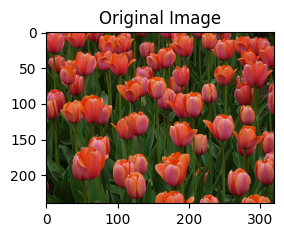

In [ ]:
import cv2
import numpy as np
from PIL import Image

image_path = '1.jpg'
original_image = Image.open(image_path)

from matplotlib import pyplot as plt

# Display the images in the same plot using subplots
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

In [ ]:
import pandas as pd
data = pd.read_excel('image_links_and_description.xlsx')

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
processor = BlipProcessor.from_pretrained("noamrot/FuseCap")
model = BlipForConditionalGeneration.from_pretrained("noamrot/FuseCap").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/896M [00:00<?, ?B/s]

In [ ]:
def image_to_text(image_path):
  raw_image = Image.open(image_path).convert('RGB')
  text = ""
  inputs = processor(raw_image, text, return_tensors="pt").to(device)
  out = model.generate(**inputs, num_beams = 3)
  print(processor.decode(out[0], skip_special_tokens=True))
  return (processor.decode(out[0], skip_special_tokens=True))

In [ ]:
# Get a list of all image files in the folder
image_folder = 'StackGAN/CUB_200_2011/images/012.Yellow_headed_Blackbird/'
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

for img in image_files:
  print(image_to_text(image_folder+img))
  print("done")

, a black bird with a long tail and orange and black head flies over a marshy area, surrounded by tall green grass, with its black wing visible in the foreground
done
, a yellow bird with a black and yellow head perches on a tree branch, its long black tail visible as it gazes off with its black eye
done
, a black bird with a yellow and black head, black eye, and black beak perches on a branch with a white and black wing its black foot and leg are visible, as well
done
, a black bird with a long tail and orange and brown head perches on a stick in calm water, with a white feather nearby and its reflection visible
done


In [ ]:
pip install mtranslate

  Preparing metadata (setup.py) ... done
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3672 sha256=f6de42238c970fa63e42590b56aa51c7b3203cd9d3da7af52b498a22749f3ff7
  Stored in directory: /root/.cache/pip/wheels/c2/04/15/d7654c2c4a9a52e09922967593f3278fed66059be65ca671ea
Successfully built mtranslate


In [ ]:
import mtranslate
import os

# Function to translate English text to Hindi
def translate_to_hindi(text):
    try:
        translated_text = mtranslate.translate(text, 'hi', 'en')
        return translated_text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

# Function to read from input file, translate, and write to output file
def translate_file(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as input_file:
        with open(output_file, 'w', encoding='utf-8') as output_file:
            for line in input_file:
                print(line)
                translated_line = translate_to_hindi(line.strip())
                print(translated_line)
                if translated_line:
                    output_file.write(translated_line + '\n')

# Input and output file paths
input_file_path = 'StackGAN/birds/example_captions.txt'  # Specify the path to your input file
output_file_path = 'StackGAN/birds/example_hindi_captions.txt'  # Specify the path to your output file

# Check if input file exists
if os.path.exists(input_file_path):
    # Translate the file
    translate_file(input_file_path, output_file_path)
    print("Translation complete. Translated text saved in 'output.txt'.")
else:
    print("Input file not found.")


this bird has a bright yellow body, with brown on its crown and wings.

इस पक्षी का शरीर चमकीला पीला होता है, जिसका मुकुट और पंख भूरे रंग के होते हैं।
this bird has a red breast and belly as well as a small bill.

इस पक्षी के स्तन और पेट के साथ-साथ छोटी चोंच भी लाल होती है।
small, roundish bird with off white breast and belly, light brown crown, brown and black colored wings.

सफेद स्तन और पेट, हल्के भूरे मुकुट, भूरे और काले रंग के पंखों वाला छोटा, गोलाकार पक्षी।
A white bird with a black crown and yellow beak

काले मुकुट और पीली चोंच वाला एक सफेद पक्षी
the bird has gray crown, belly and white abdomen, with black tarsus and feet

पक्षी का मुकुट, पेट और सफेद पेट, काले टारसस और पैर होते हैं
a colorful bird with a bright yellow body, a black crown and throat, orange bill, and black primaries and secondaries.

चमकीले पीले शरीर, काले मुकुट और गले, नारंगी चोंच और काले प्राइमरी और सेकेंडरी वाला एक रंगीन पक्षी।
Translation complete. Translated text saved in 'output.txt'.


In [ ]:
import mtranslate as mt

def translate_hindi_to_english(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as f_input, open(output_file, 'w', encoding='utf-8') as f_output:
        for line in f_input:
            print(line)
            # Remove leading and trailing whitespaces
            line = line.strip()
            # Translate Hindi text to English
            translated_line = mt.translate(line, "en", "auto")
            print(translated_line)
            # Write translated text to output file
            f_output.write(translated_line + '\n')

# Example usage:
input_file = 'StackGAN/birds/example_hindi_captions.txt'  # Path to input file containing Hindi text
output_file = 'StackGAN/birds/example_english_captions.txt'  # Path to output file for saving translated English text

translate_hindi_to_english(input_file, output_file)

इस पक्षी का शरीर चमकीला पीला होता है, जिसका मुकुट और पंख भूरे रंग के होते हैं।

The body of this bird is bright yellow, with its crown and wings being brown.
इस पक्षी के स्तन और पेट के साथ-साथ छोटी चोंच भी लाल होती है।

The breast and belly as well as the small beak of this bird are red.
सफेद स्तन और पेट, हल्के भूरे मुकुट, भूरे और काले रंग के पंखों वाला छोटा, गोलाकार पक्षी।

A small, rounded bird with a white breast and belly, light brown crown, brown and black wings.
काले मुकुट और पीली चोंच वाला एक सफेद पक्षी

a white bird with a black crown and yellow beak
पक्षी का मुकुट, पेट और सफेद पेट, काले टारसस और पैर होते हैं

The bird has a white crown, belly and belly, black tarsus and legs.
चमकीले पीले शरीर, काले मुकुट और गले, नारंगी चोंच और काले प्राइमरी और सेकेंडरी वाला एक रंगीन पक्षी।

A colorful bird with a bright yellow body, black crown and throat, orange bill and black primaries and secondaries.
